## Final Project

### Project Goal

This analysis can help to understand the factors affecting the pricing of cars in the American market. It will be helpful in deciding 

Significant variables in predicting the price of a car
How well those variables describe the price of a car


### Data Importing and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

* Imported required libraries: pandas, numpy, sklearn, matplotib 
* Check for head, summary, info, NA values 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
cars1 = pd.read_csv("D:/Course/Python/Car-1.csv")
cars2 = pd.read_csv("D:/Course/Python/Car-2.csv")

In [3]:
# Let's take a look at the first few rows
cars1.head()

,car_ID,symboling,CarName,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# Let's take a look at the first few rows
cars1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
dtypes: float64(8), int64(8), object(1)
memory usage: 27.4+ KB


In [5]:
cars1.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
cars1.isna().sum()

car_ID              0
symboling           0
CarName             0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# Let's take a look at the first few rows
cars2.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [8]:
# Let's take a look at the first few rows
cars2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 12 columns):
car_ID            205 non-null int64
symboling         205 non-null int64
CarName           205 non-null object
fueltype          205 non-null object
aspiration        205 non-null object
doornumber        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
enginelocation    205 non-null object
enginetype        205 non-null object
cylindernumber    205 non-null object
fuelsystem        205 non-null object
dtypes: int64(2), object(10)
memory usage: 19.3+ KB


In [9]:
cars2.describe()

,car_ID,symboling
count,205.000000,205.000000
mean,103.000000,0.834146
std,59.322565,1.245307
min,1.000000,-2.000000
25%,52.000000,0.000000
50%,103.000000,1.000000
75%,154.000000,2.000000
max,205.000000,3.000000


In [10]:
cars2.isna().sum()

car_ID            0
symboling         0
CarName           0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
enginetype        0
cylindernumber    0
fuelsystem        0
dtype: int64

After analysing summary and key variables, merge the dataset for further analysis
* Used __inner join__ for merging cars1 and cars2 dataset

In [11]:
#merging above datasets
cars = pd.merge(cars1,cars2,on='car_ID', how='inner')
cars.head()

,car_ID,symboling_x,CarName_x,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,CarName_y,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [12]:
cars.isna().sum()

car_ID              0
symboling_x         0
CarName_x           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
symboling_y         0
CarName_y           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
enginetype          0
cylindernumber      0
fuelsystem          0
dtype: int64

In [13]:
cars.shape

(205, 28)

* Final dataset 'cars' consists of 205 rows and 28 columns
* The dataset is clean and contains no null values
* The dataset consists of classification and quantative variables 

Further analysis and EDA will be done on `cars` dataset

#### Understanding the Data

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [14]:
#count of unique cars
cars['CarName_y'].value_counts()

toyota corolla          6
peugeot 504             6
toyota corona           6
subaru dl               4
mitsubishi mirage g4    3
                       ..
vokswagen rabbit        1
buick skyhawk           1
renault 12tl            1
mitsubishi mirage       1
isuzu MU-X              1
Name: CarName_y, Length: 147, dtype: int64

In [15]:
#view different types of fuel sources
cars['fueltype'].value_counts()


gas       185
diesel     20
Name: fueltype, dtype: int64

In [16]:
# Symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling_y'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling_y, dtype: int64

In [17]:
# Aspiration: An (internal combustion) engine property showing whether the oxygen intake is standard (through atmospheric 
# pressure) or through turbocharging (pressurised oxygen intake)

cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [18]:
# Drivewheel: frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

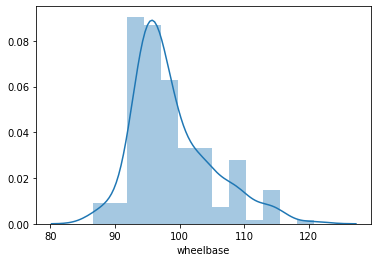

In [19]:
# Wheelbase: distance between centre of front and rarewheels
sns.distplot(cars['wheelbase'])
plt.show()

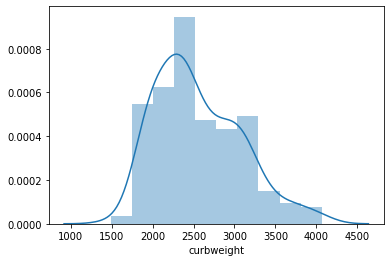

In [20]:
# Curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

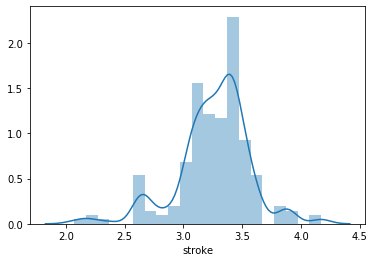

In [21]:
sns.distplot(cars['stroke'])
plt.show()

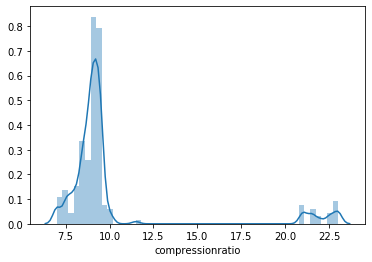

In [22]:
# Compression ration: ration of volume of compression chamber at largest capacity to least capacity
sns.distplot(cars['compressionratio'])
plt.show()

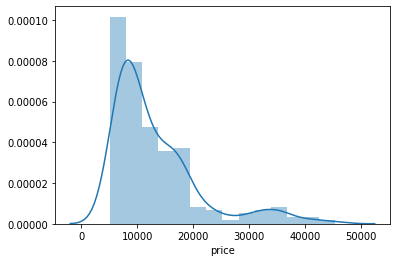

In [23]:
# Target variable: price of car
sns.distplot(cars['price'])
plt.show()

* Categorizing data by fueltype : used __groupby__ for the same
* Majority cars have `gas` as `fueltype`

In [75]:
cars.groupby('fueltype').count()

,car_ID,symboling_x,CarName_x,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,symboling_y,CarName_y,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
fueltype,,,,,,,,,,,,,,,,,,,,,
diesel,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
gas,185,185,185,185,185,185,185,185,185,185,...,185,185,185,185,185,185,185,185,185,185


In [24]:
# Checking the different levels of 'cylindernumber'
cars['cylindernumber'].astype('category').value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [25]:
# Checking the different levels of 'doornumber'
cars['doornumber'].astype('category').value_counts()

four    115
two      90
Name: doornumber, dtype: int64

Converting `cylindernumber` and `doornumber` to int for data modelling 
* Made a __function__ to convert them to numerical form

In [26]:
# A function to map the categorical levels to actual numbers. We can see the categorical levels above and use them
#for mapping.
def num_map(x):
    return x.map({'two': 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8, "twelve": 12})

# Applying the function to the two columns
cars[['cylindernumber', 'doornumber']] = cars[['cylindernumber', 'doornumber']].apply(num_map)

In [27]:
cars.head()

,car_ID,symboling_x,CarName_x,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,...,CarName_y,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,3,alfa-romero giulia,88.6,168.8,64.1,48.8,2548,130,3.47,...,alfa-romero giulia,gas,std,2,convertible,rwd,front,dohc,4,mpfi
1,2,3,alfa-romero stelvio,88.6,168.8,64.1,48.8,2548,130,3.47,...,alfa-romero stelvio,gas,std,2,convertible,rwd,front,dohc,4,mpfi
2,3,1,alfa-romero Quadrifoglio,94.5,171.2,65.5,52.4,2823,152,2.68,...,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,ohcv,6,mpfi
3,4,2,audi 100 ls,99.8,176.6,66.2,54.3,2337,109,3.19,...,audi 100 ls,gas,std,4,sedan,fwd,front,ohc,4,mpfi
4,5,2,audi 100ls,99.4,176.6,66.4,54.3,2824,136,3.19,...,audi 100ls,gas,std,4,sedan,4wd,front,ohc,5,mpfi


In [28]:
# summary of final dataset
cars.describe()

,car_ID,symboling_x,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_y,doornumber,cylindernumber
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.834146,3.121951,4.380488
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,1.245307,0.994966,1.080854
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,-2.000000,2.000000,2.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,2.000000,4.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,1.000000,4.000000,4.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,2.000000,4.000000,4.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,3.000000,4.000000,12.000000


Let's now make a pairwise scatter plot and observe linear relationships.
* Correlation check
* Pair-wise correlation plot


<Figure size 1440x720 with 0 Axes>

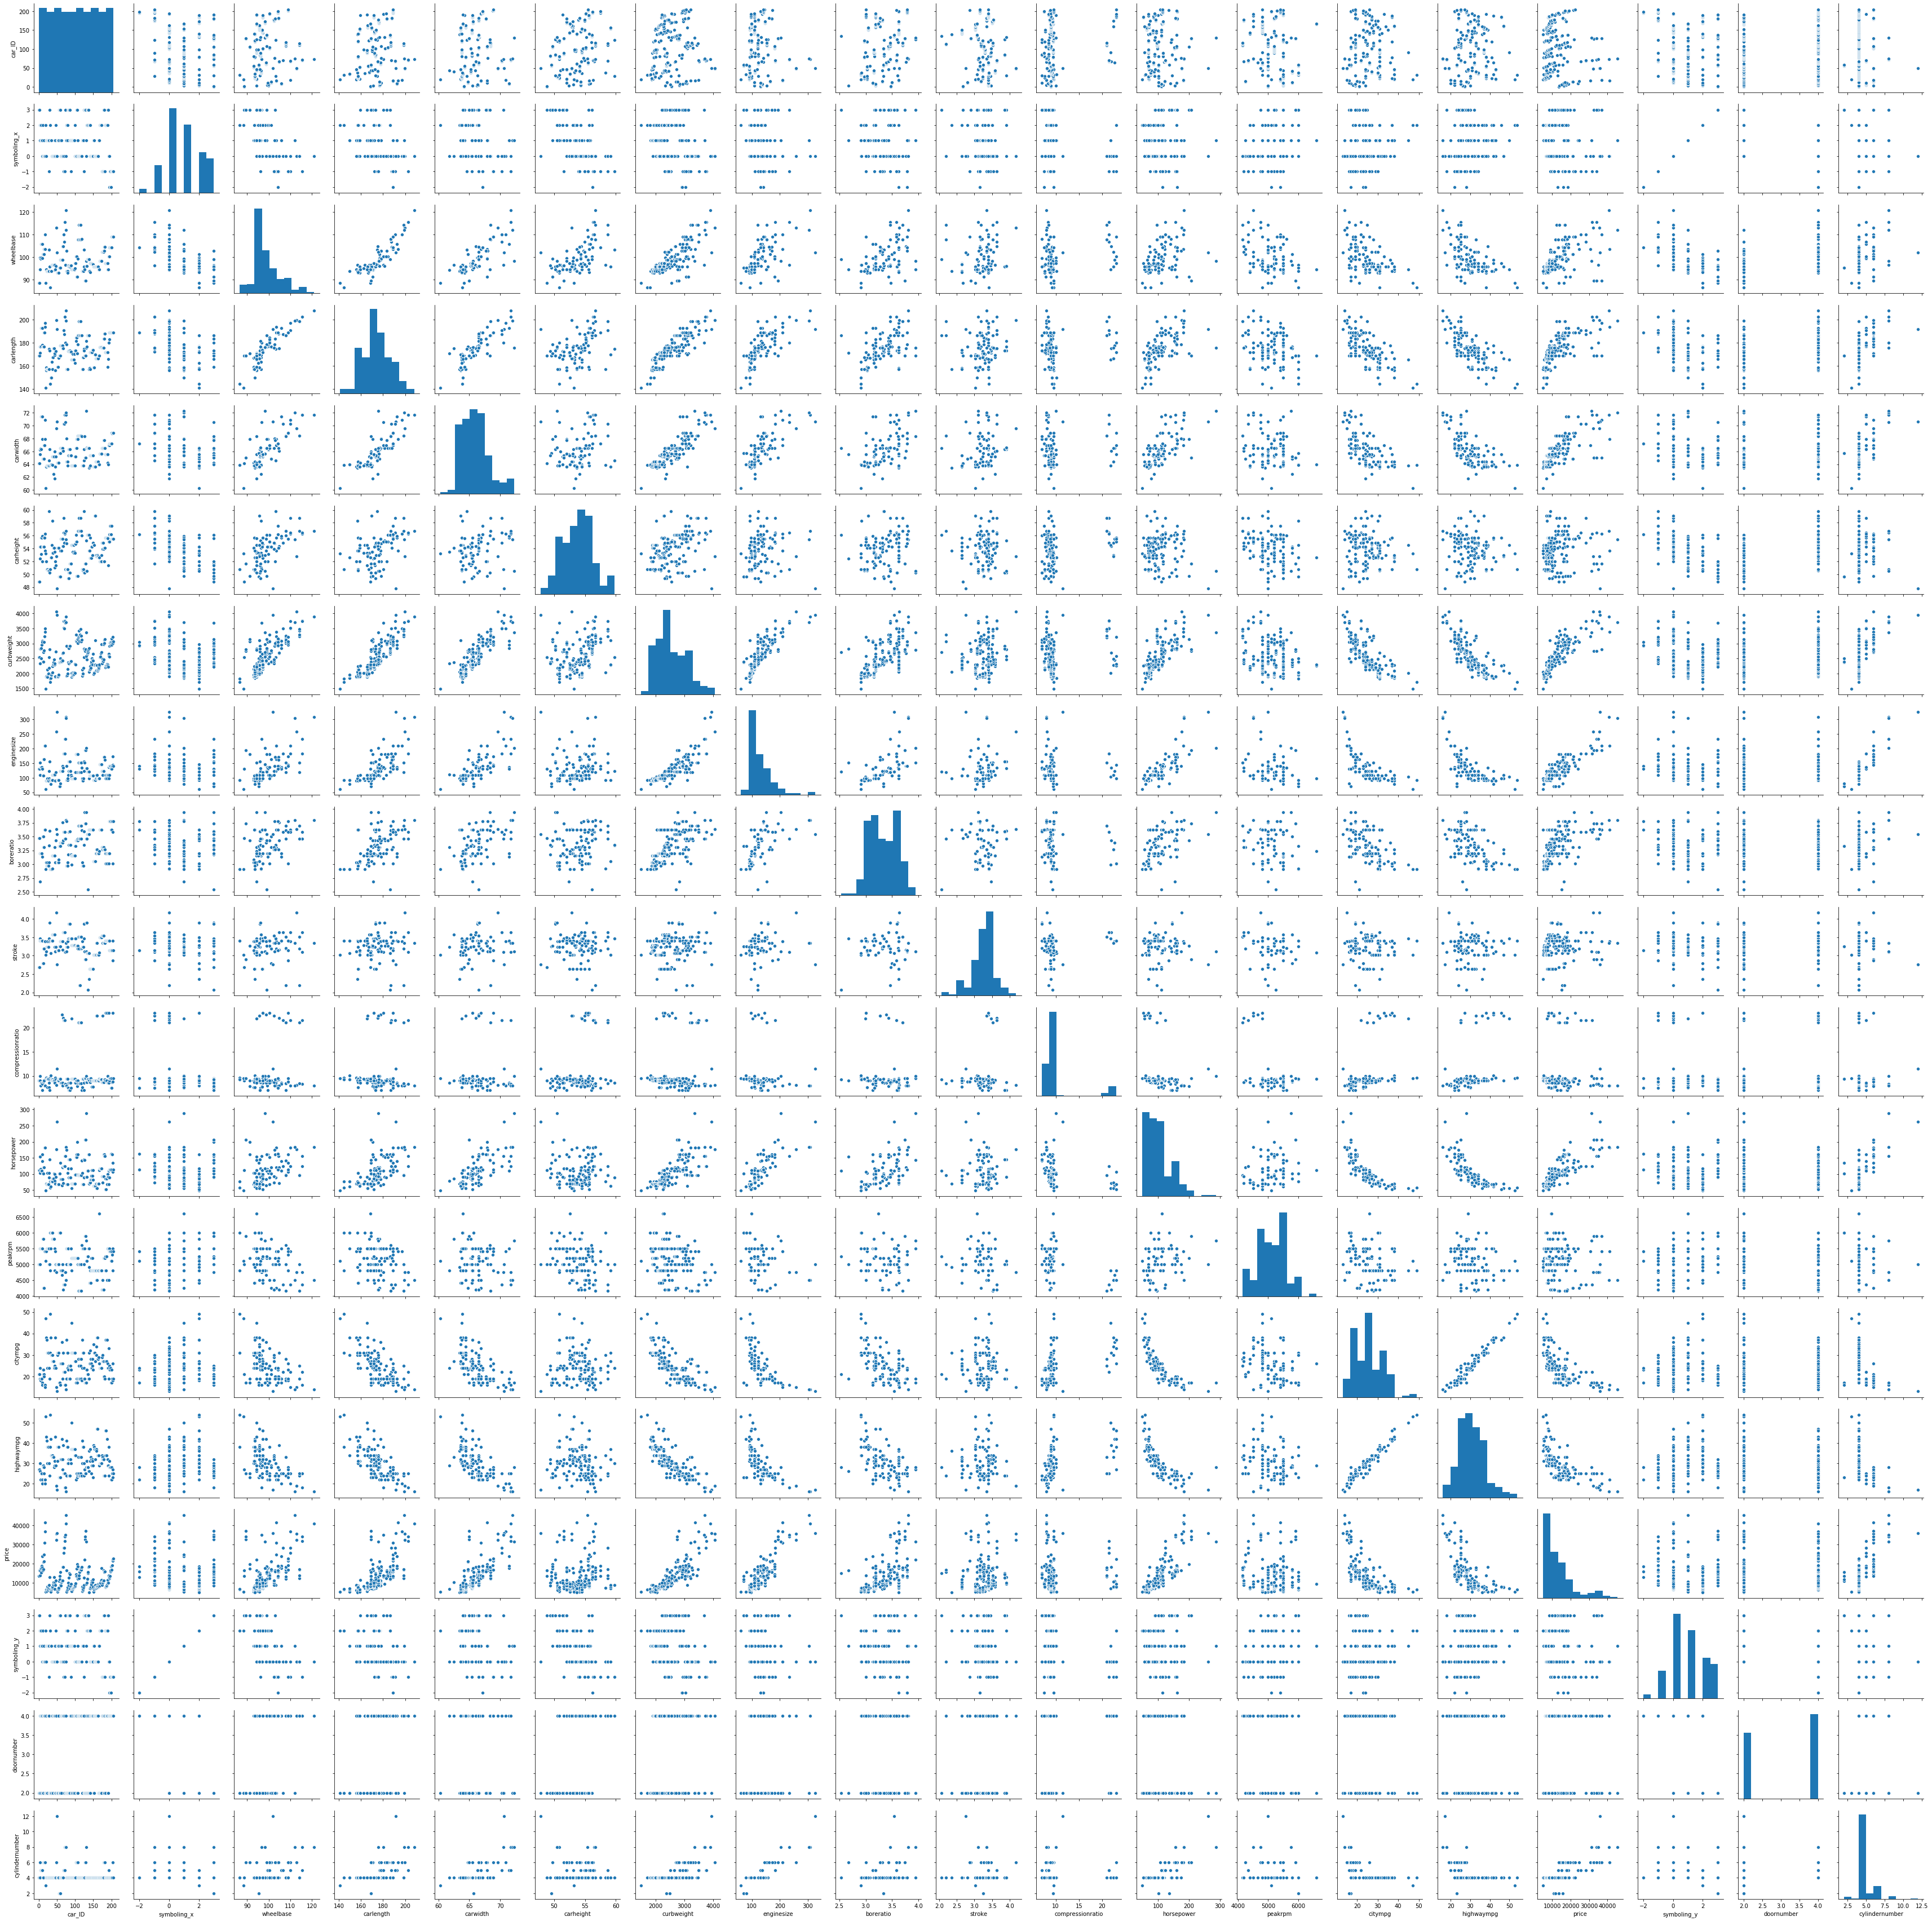

In [29]:
# Pairwise scatter plot

plt.figure(figsize=(20, 10))
sns.pairplot(cars)
plt.show()

In [30]:
# Correlation matrix
cars.corr()

,car_ID,symboling_x,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_y,doornumber,cylindernumber
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093,-0.151621,0.190352,-0.094493
symboling_x,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978,1.000000,-0.664073,-0.113129
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816,-0.531954,0.447357,0.339507
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920,-0.357612,0.398568,0.430672
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325,-0.232919,0.207168,0.545007
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336,-0.541038,0.552208,-0.013995
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305,-0.227691,0.197379,0.609727
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145,-0.105790,0.020742,0.846031
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173,-0.130051,0.119258,0.231399
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443,-0.008735,-0.011082,0.008210


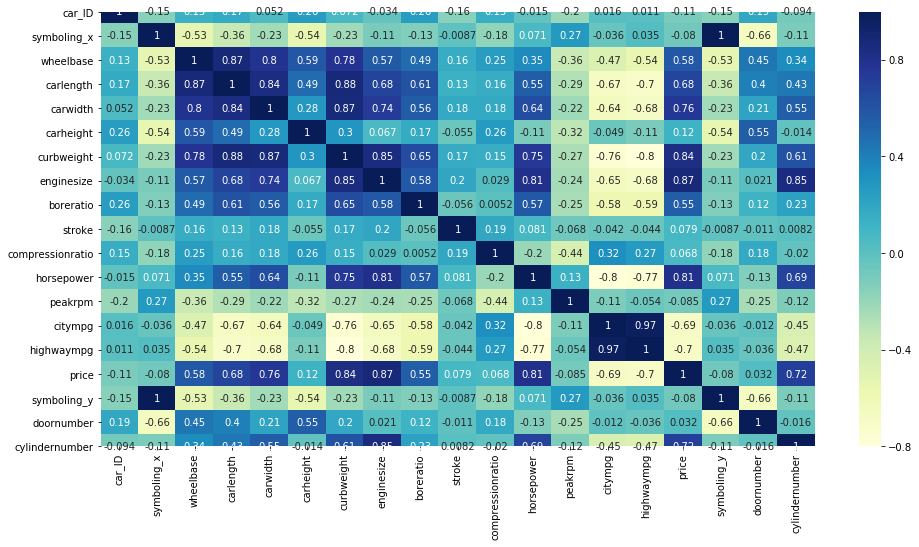

In [31]:
# Figure size
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(cars.corr(), cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:

* Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower (notice how all of these variables represent the size/weight/engine power of the car)

* Price is negatively correlated to citympg and highwaympg (-0.70 approximately). This suggests that cars having high mileage may fall in the 'economy' cars category, and are priced lower (think cars that are designed to be affordable by the middle class, who value mileage more than horsepower/size of car etc.)

Correlation among independent variables:

* Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

Thus, while building the model, we'll have to pay attention to multicollinearity.

### Model Building and Evaluation
The first step to model building is the usual test-train split. So, divided the data in 70-30 ratio and did analysis. 

In [45]:
# Split the datafram into train and test sets
from sklearn.model_selection import train_test_split


205
(143, 17) (143,)
(62, 17) (62,)


In [56]:
cars_train, cars_test = train_test_split(cars, train_size=0.7, test_size=0.3, random_state=100)

In [59]:
# Split the train dataset into X and y

y_train = cars_train['price']
x_train = cars_train[['symboling_x', 'wheelbase', 'carlength', 'carwidth', 'carheight',
              'curbweight', 'enginesize', 'boreratio', 'stroke',
              'stroke', 'compressionratio', 'horsepower', 'peakrpm' , 'citympg', 'highwaympg', 'doornumber', 
           'cylindernumber']]

In [63]:
# Split the test dataset into X and y

y_test = cars_test['price']
x_test = cars_test[['symboling_x', 'wheelbase', 'carlength', 'carwidth', 'carheight',
              'curbweight', 'enginesize', 'boreratio', 'stroke',
              'stroke', 'compressionratio', 'horsepower', 'peakrpm' , 'citympg', 'highwaympg', 'doornumber', 
           'cylindernumber']]

In [64]:
# Linear Regression - all numeric variables
# model fit train dataset

lm = LinearRegression(fit_intercept = True)
model1 = lm.fit(x_train, y_train)
model1.score(x_train, y_train)


0.8631853406951001

In [65]:
# model fit test dataset

pred1 = model1.predict(x_test)
print(pred1.shape)


(62,)


In [66]:
y_test.shape

(62,)

In [49]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 7.12537518e+02  2.55528246e+02 -1.23372336e+02  3.49136648e+02
  2.42544587e+01 -3.42534870e-01  1.57430463e+02 -1.53003741e+03
 -1.92529954e+03 -1.92529954e+03  5.22912394e+02  5.64402314e+01
  3.09832943e+00 -9.44748569e+01  1.23530024e+00  7.21369921e+02
 -6.87792160e+02]
-40756.22934779712


In [70]:
# Import statsmodels
import statsmodels.api as sm  

# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     49.68
Date:                Sat, 18 Apr 2020   Prob (F-statistic):           1.64e-46
Time:                        18:40:49   Log-Likelihood:                -1341.9
No. Observations:                 143   AIC:                             2718.
Df Residuals:                     126   BIC:                             2768.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.248e+04   1.84e+04  

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test, pred1)

0.7956218235152022

#### Results and Summary

* Adj. R square of 0.846 inferes a good describtion of model
* Only 8 variables are significant as they have p-value less than 0.05, remaining variables can be treated as as non-significant and eliminated using RFE/other variable selection techniques.
* R2_Score on testing data is 0.79, infers the model accuracy of 79%
* Though this is a simple model built till now, few final predictors seem to have high correlations. We can go ahead and remove some of these features, though that will affect the adjusted-r2 score significantly.

Thus, for now, the final model consists of the 17 variables mentioned above